# Deepir implementation
### The code is based on [deepir](https://github.com/TaddyLab/deepir) with slight modification
### Data is based on [Kaggle Yelp Review](https://www.kaggle.com/c/yelp-recruiting/data)

# 1. Yelp data

In [1]:
import re
import json
import pandas as pd

## Preprocessing data 

In [2]:
# all non alphanumeric
contractions = re.compile(r"'|-")
symbols = re.compile(r'(\W+)', re.U)
numeric = re.compile(r'(?<=\s)(\d+|\w\d+|\d+\w)(?=\s)', re.I)
swrd = re.compile(r'(?<=\s)(,|"|\(|\)|to|a|as|the|an|and|or|for|are|is)(?=\s)', re.I)
suffix = re.compile(r'(?<=\w)(s|ings*|ly|(?<=e)[sd]+)(?=\s)')
seps = re.compile(r'\s+')

In [3]:
# cleaner (order matters)
def clean(text): 
    text = u' ' +  text.lower() + u' '
    text = contractions.sub('', text)
    text = symbols.sub(r' \1 ', text)
    text = numeric.sub('000', text)
    text = swrd.sub(' ', text)
    #text = suffix.sub('', text)
    text = seps.sub(' ', text)
    return text

In [4]:
def preprocess(f_dir):
    data = []
    for line in open(f_dir,'r'):
        d = json.loads(line)
        txt = clean(d['text'])
        data.append([d['stars'],txt])
    return pd.DataFrame(data=data,columns=['stars','txt'])

In [5]:
%time train_df = preprocess('data/yelp_review_small_set/yelp_training_set/yelp_training_set_review.json')

CPU times: user 3min 37s, sys: 1.45 s, total: 3min 38s
Wall time: 3min 38s


In [6]:
train_df

,stars,txt
0,5,my wife took me here on my birthday breakfast...
1,5,i have no idea why some people give bad revie...
2,4,love gyro plate . rice so good i also dig the...
3,5,rosie dakota i love chaparral dog park !!! it...
4,5,general manager scott petello good egg !!! no...
5,4,quiessence simply put beautiful . full window...
6,5,drop what youre doing drive here . after i at...
7,4,luckily i didnt have travel far make my conne...
8,4,definitely come happy hour ! prices amazing s...
9,5,nobuo shows his unique talents with everythin...


In [7]:
%time test_df = preprocess('data/yelp_review_small_set/yelp_test_set/yelp_test_set_review.json')

CPU times: user 19.3 s, sys: 114 ms, total: 19.4 s
Wall time: 19.6 s


In [8]:
test_df

,stars,txt
0,5,nice place big patio . now offering live sket...
1,5,friendly staff . make sure you order gyro pla...
2,5,love love love this place breakfast . they al...
3,1,disgusting sandwich . i should have known bet...
4,4,always fan of cafe zupas their very friendly ...
5,5,when i first get there i check lot see deals ...
6,4,great salsa especially if you mix red green t...
7,4,ajs unsweeted tea selection amazing ! with so...
8,4,i stop in here from time time with friend who...
9,2,ugh . i want love this place like some of my ...


## Re-write of deepir

In [9]:
import numpy as np
from gensim.models import Word2Vec
from gensim.models import Phrases
from copy import deepcopy

import warnings
warnings.filterwarnings("ignore")

Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: Quadro K2000 (CNMeM is disabled)


In [10]:
# define a review generator
alteos = re.compile(r'( [!\?] )')

def revsplit(l):
    l = alteos.sub(r' \1 . ', l).rstrip("( \. )*\n")
    return [s.split() for s in l.split(" . ")]

def YelpReviews(df):
    data = []
    for star,txt in df.values:
        data.append([star,revsplit(txt)])
    return pd.DataFrame(data=data,columns=['stars','txt'])

In [11]:
%time preprocessed_train_df = YelpReviews(train_df)

CPU times: user 20.9 s, sys: 2.28 s, total: 23.2 s
Wall time: 23.1 s


In [12]:
all_sentences = [s for r in preprocessed_train_df.txt for s in r]
len(all_sentences)

2027394

In [13]:
jointmodel = Word2Vec(workers=-1)
np.random.shuffle(all_sentences)
jointmodel.build_vocab(all_sentences)

In [14]:
def trainW2V(g, T=25):
    sent = [l for r in reviews[g] for l in r]
    model[g].min_alpha = model[g].alpha
    for epoch in range(T):
        print epoch, " "
        np.random.shuffle(sent)
        model[g].train(sent)
        model[g].alpha *= 0.9  
        model[g].min_alpha = model[g].alpha  
    print(".")

In [15]:
def getprobs(rev, grp,by = 'average'):
    if by == 'average':
        sentences =  [(i,s) for i,r in enumerate(rev) for s in r]
        eta = pd.DataFrame(
                { g: model[g].score([s for i,s in sentences])  
                 for g in grp } )
        probs = eta.subtract( eta.max('columns'), 'rows') 
        probs = np.exp( probs )
        probs = probs.divide(probs.sum('columns'), "rows")
        probs['cnt'] = 1
        probs = probs.groupby([i for i,s in sentences]).sum()
        probs = probs.divide(probs["cnt"], 'rows').drop("cnt", 1)
    elif by == 'product':
#         sentences =  [(i,s) for i,r in enumerate(rev) for s in r]
#         eta = pd.DataFrame(
#                 { g: model[g].score([s for i,s in sentences])  
#                  for g in grp } )
#         probs = eta.groupby([i for i,s in sentences]).sum()
#         probs = probs.subtract( probs.max('columns'), 'rows')
#         probs = np.exp( probs )
#         probs = probs.divide(probs.sum('columns'), "rows")
        sentences =  [(i,s) for i,r in enumerate(rev) for s in r]
        eta = pd.DataFrame(
                { g: model[g].score([s for i,s in sentences])  
                 for g in grp } )
        probs = eta.groupby([i for i,s in sentences]).sum()
        probs = probs.subtract( probs.min('columns'), 'rows')
        #probs = np.exp( probs )
        probs = probs.divide(probs.sum('columns'), "rows")
        probs.replace([np.inf, -np.inf],0)
        probs.fillna(0)
    return(probs)

### classification by log product probability-- task c

In [16]:
docgrp_fine = {str(i) : i for i in range(1,6)} 
docgrp_fine

{'1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

In [17]:
model = {}
reviews = {}
model = { g: deepcopy(jointmodel) for g in docgrp_fine }
for g in docgrp_fine:
    print g, ":"
    reviews[g] = preprocessed_train_df[preprocessed_train_df['stars']==docgrp_fine[g]].txt
    model[g] = deepcopy(jointmodel)
    trainW2V( g,T=25 )

1 :
0

  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
20

  
21

  
22

  
23

  
24

  
.
3 :
0

  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
20

  
21

  
22

  
23

  
24

  
.
2 :
0

  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
20

  
21

  
22

  
23

  
24

  
.
5 :
0

  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
20

  
21

  
22

  
23

  
24

  
.
4 :
0

  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
20

  
21

  
22

  
23

  
24

  
.


In [19]:
## by average 25 iterations
%time preprocessed_test_df = YelpReviews(test_df)
testrev = {}
probs = {}
yhat = {}
for g in docgrp_fine:
    testrev[g] =  preprocessed_test_df[preprocessed_test_df['stars']==docgrp_fine[g]].txt.values
    probs[g] = getprobs(testrev[g], docgrp_fine)
    yhat[g] = probs[g].idxmax("columns")

mc_fine = pd.DataFrame({
    'mcr': {g: (yhat[g] != g).mean() for g in docgrp_fine},
    'n': {g: len(testrev[g]) for g in docgrp_fine}
    })
print(mc_fine)

ntest = mc_fine['n'].sum()
overall_fine = mc_fine.product("columns").sum()/ntest
print("\nOverall Fine-Scale MCR: %.3f" %overall_fine)

CPU times: user 2.43 s, sys: 174 ms, total: 2.61 s
Wall time: 2.58 s
        mcr     n
1  0.251681  2380
2  0.643381  2047
3  0.649000  2849
4  0.557606  6883
5  0.268614  8797

Overall Fine-Scale MCR: 0.434


In [20]:
## by product 25 iterations
for g in docgrp_fine:
    testrev[g] =  preprocessed_test_df[preprocessed_test_df['stars']==docgrp_fine[g]].txt.values
    probs[g] = getprobs(testrev[g], docgrp_fine, by='product')
    yhat[g] = probs[g].idxmax("columns")

mc_fine = pd.DataFrame({
    'mcr': {g: (yhat[g] != g).mean() for g in docgrp_fine},
    'n': {g: len(testrev[g]) for g in docgrp_fine}
    })
print(mc_fine)

ntest = mc_fine['n'].sum()
overall_fine = mc_fine.product("columns").sum()/ntest
print("\nOverall Fine-Scale MCR: %.3f" %overall_fine)

        mcr     n
1  0.309244  2380
2  0.600391  2047
3  0.607231  2849
4  0.466512  6883
5  0.320450  8797

Overall Fine-Scale MCR: 0.424


In [21]:
groups = ['1','2','3','4','5']
prediction_a = getprobs(preprocessed_test_df.txt.values,groups)
prediction_a['label'] = pd.Series(preprocessed_test_df.stars.values,index=prediction_a.index)
prediction_a['prediction'] = pd.Series(prediction_a[groups].idxmax('columns').values,index=prediction_a.index).astype(np.float64)
prediction_a['txt'] = pd.Series(preprocessed_test_df.txt.values,index=prediction_a.index)


prediction_p = getprobs(preprocessed_test_df.txt.values,groups,by='product')
prediction_p['label'] = pd.Series(preprocessed_test_df.stars.values,index=prediction_p.index)
prediction_p['prediction'] = pd.Series(prediction_p[groups].idxmax('columns').values,index=prediction_p.index).astype(np.float64)
prediction_p['txt'] = pd.Series(preprocessed_test_df.txt.values,index=prediction_p.index)
prediction_p=prediction_p.fillna(1)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(prediction_a.prediction.values,prediction_a.label.values)

array([[1781,  619,  314,  295,  408],
       [ 396,  730,  398,  182,   55],
       [  84,  429, 1000,  864,  192],
       [  55,  172,  809, 3045, 1708],
       [  64,   97,  328, 2497, 6434]])

In [24]:
confusion_matrix(prediction_p.prediction.values.astype(np.int),prediction_p.label.values)

array([[1653,  471,  227,  214,  350],
       [ 520,  818,  421,  156,   51],
       [ 113,  532, 1119,  900,  199],
       [  49,  186,  877, 3672, 2219],
       [  45,   40,  205, 1941, 5978]])

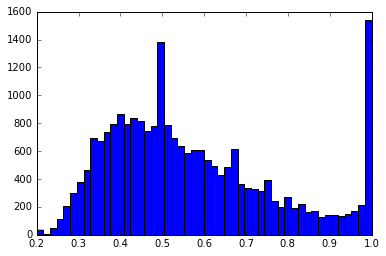

In [25]:
import matplotlib.pylab as plt
%matplotlib inline
pred_probs_a = prediction_a[groups].values.max(axis=1)
_= plt.hist(pred_probs_a,bins=50)

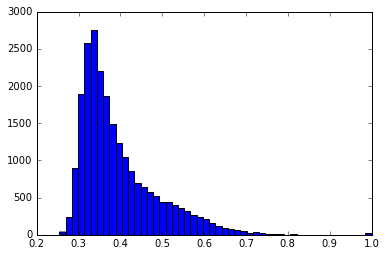

In [26]:
import matplotlib.pylab as plt
%matplotlib inline
pred_probs_p = prediction_p[groups].values.max(axis=1)
_= plt.hist(pred_probs_p,bins=50)

### Overall distribution for log probability of sentences

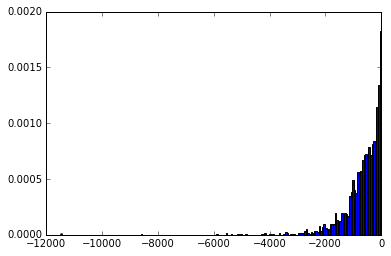

In [82]:
c = 5
log_probs = []
index = (prediction_a.label == c)
n = np.where(index)[0].shape[0]
for i in range(300):
    sentences = prediction_a[index].txt.values[i]
    data = []
    data = model[str(c)].score(sentences)
    log_probs.append(data)
log_probs = np.concatenate(log_probs)
_=plt.hist(log_probs,bins=200,normed=True)

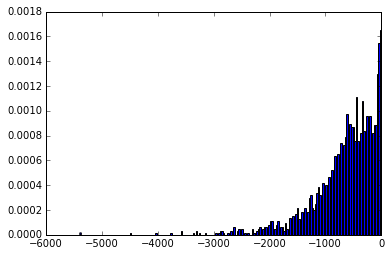

In [83]:
c = 4
log_probs = []
index = (prediction_a.label == c)
n = np.where(index)[0].shape[0]
for i in range(300):
    sentences = prediction_a[index].txt.values[i]
    data = []
    data = model[str(c)].score(sentences)
    log_probs.append(data)
log_probs = np.concatenate(log_probs)
_=plt.hist(log_probs,bins=200,normed=True)

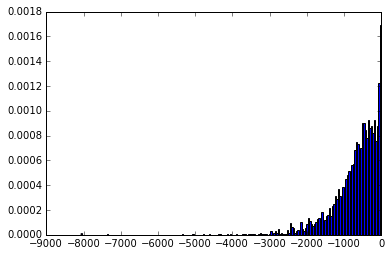

In [84]:
c = 3
log_probs = []
index = (prediction_a.label == c)
n = np.where(index)[0].shape[0]
for i in range(300):
    sentences = prediction_a[index].txt.values[i]
    data = []
    data = model[str(c)].score(sentences)
    log_probs.append(data)
log_probs = np.concatenate(log_probs)
_=plt.hist(log_probs,bins=200,normed=True)

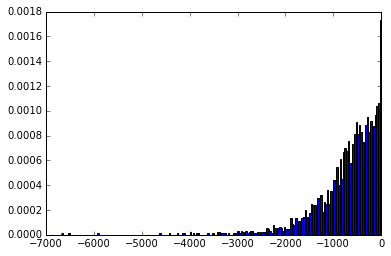

In [85]:
c = 2
log_probs = []
index = (prediction_a.label == c)
n = np.where(index)[0].shape[0]
for i in range(300):
    sentences = prediction_a[index].txt.values[i]
    data = []
    data = model[str(c)].score(sentences)
    log_probs.append(data)
log_probs = np.concatenate(log_probs)
_=plt.hist(log_probs,bins=200,normed=True)

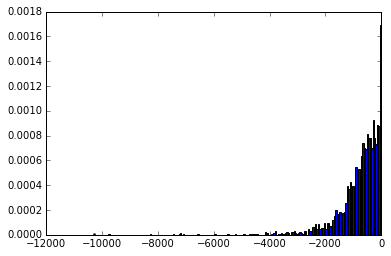

In [86]:
c = 1
log_probs = []
index = (prediction_a.label == c)
n = np.where(index)[0].shape[0]
for i in range(300):
    sentences = prediction_a[index].txt.values[i]
    data = []
    data = model[str(c)].score(sentences)
    log_probs.append(data)
log_probs = np.concatenate(log_probs)
_=plt.hist(log_probs,bins=200,normed=True)

In [107]:
from scipy.stats import skew

### Difference with others

208.59 -148.562 0.264215 18.5224 0.638199567795


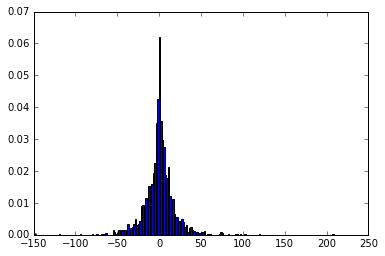

In [125]:
c = 5
diff =[]
index = (prediction_a.label == c)
n = 300 #np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif =  data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=200,normed=True)

print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

55.6381 -218.591 -4.14398 13.5104 -2.90807366371


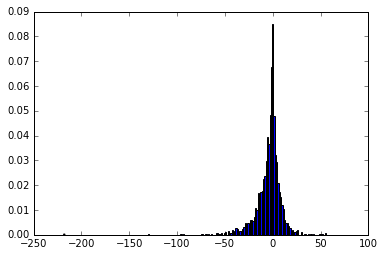

In [126]:
c = 4
diff =[]
index = (prediction_a.label == c)
n = 300 #np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif =  data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=200,normed=True)
print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

55.6381 -218.591 -4.14398 13.5104 -2.90807366371


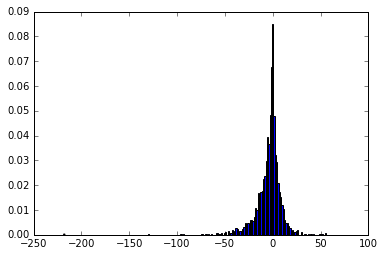

In [127]:
c = 4
diff =[]
index = (prediction_a.label == c)
n = 300 #np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif =  data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=200,normed=True)
print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

60.7549 -449.364 -7.94098 18.5253 -7.0327501297


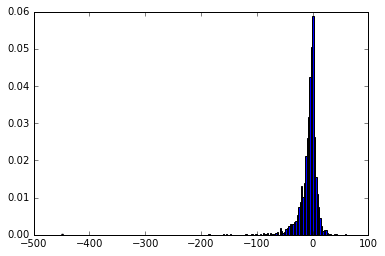

In [128]:
c = 3
diff =[]
index = (prediction_a.label == c)
n = 300 #np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif =  data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=200,normed=True)
print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

48.4174 -196.065 -7.78312 16.7122 -2.41050958633


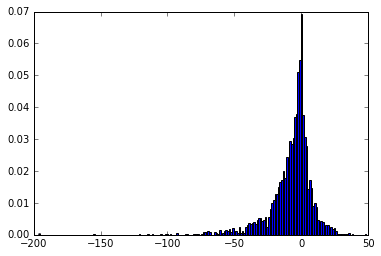

In [129]:
c = 2
diff =[]
index = (prediction_a.label == c)
n = 300 #np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif =  data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=200,normed=True)
print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

319.826 -155.264 5.20374 28.0665 1.72677206993


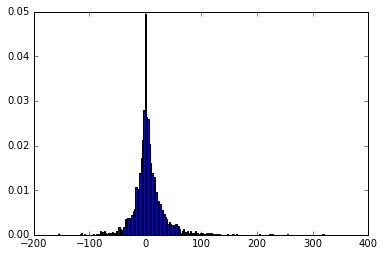

In [130]:
c = 1
diff =[]
index = (prediction_a.label == c)
n = 300 #np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif =  data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=200,normed=True)
print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

### Difference in log probability between sentences in a class
#### - right prediction (product) & wrong prediciction (avearage)
#### - difference = log_prob|c - max(log_prob| not in c)

95.1659 -91.2968 -1.50078 15.5585 0.708230018616


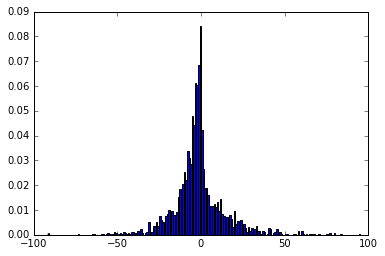

In [131]:
c = 5
diff =[]
index = (prediction_a.prediction != c) & (prediction_p.prediction == c) & (prediction_a.label == c)
n = np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif =  data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=200,normed=True)
print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

83.009 -145.392 -4.06961 10.9705 -1.27268207073


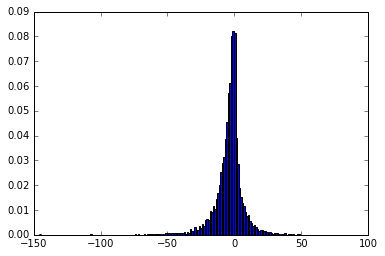

In [132]:
c = 4
diff =[]
index = (prediction_a.prediction != c) & (prediction_p.prediction == c) & (prediction_a.label == c)
n = np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif =  data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=200,normed=True)
print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

84.5952 -96.3613 -5.23491 11.2207 -1.26486623287


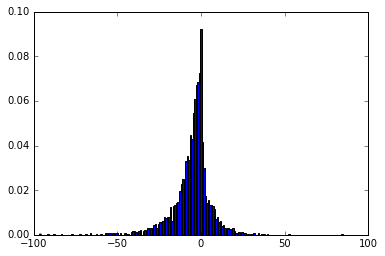

In [133]:
c = 3
diff =[]
index = (prediction_a.prediction != c) & (prediction_p.prediction == c) & (prediction_a.label == c)
n = np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif =  data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=200,normed=True)
print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

58.3274 -130.865 -6.00766 13.2191 -0.968119084835


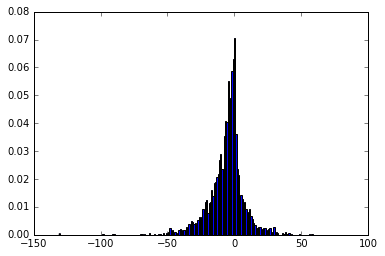

In [134]:
c = 2
diff =[]
index = (prediction_a.prediction != c) & (prediction_p.prediction == c) & (prediction_a.label == c)
n = np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif = data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=200,normed=True)
print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

69.969 -73.2148 -0.783871 17.4667 0.986520051956


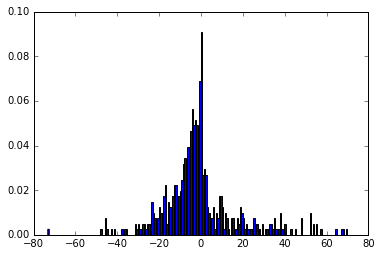

In [135]:
c = 1
diff =[]
index = (prediction_a.prediction != c) & (prediction_p.prediction == c) & (prediction_a.label == c)
n = np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif =  data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=200,normed=True)
print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

### Difference in log probability between sentences in a class
#### - right prediction for average & wrong for product
#### - difference = log_prob|c - max(log_prob| not in c)

84.1079 -151.529 -5.26044 16.4234 -1.80767869949


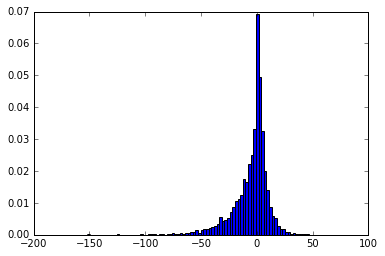

In [136]:
c = 5
diff =[]
index = (prediction_a.prediction == c) & (prediction_p.prediction != c) & (prediction_a.label == c)
n = np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif =  data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=100,normed=True)
print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

61.9756 -179.182 -5.81737 15.8855 -2.77254605293


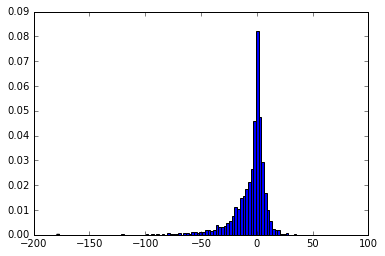

In [137]:
c = 4
diff =[]
index = (prediction_a.prediction == c) & (prediction_p.prediction != c) & (prediction_a.label == c)
n = np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif =  data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=100,normed=True)
print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

63.7928 -123.301 -6.27903 16.2224 -2.44895339012


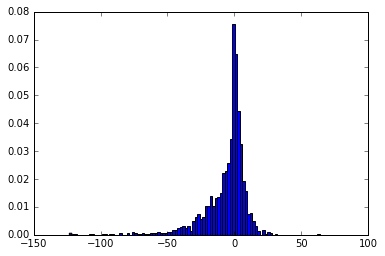

In [138]:
c = 3
diff =[]
index = (prediction_a.prediction == c) & (prediction_p.prediction != c) & (prediction_a.label == c)
n = np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif =  data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=100,normed=True)
print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

30.4823 -190.195 -6.85738 16.7805 -2.90988731384


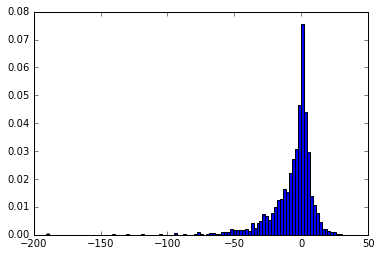

In [139]:
c = 2
diff =[]
index = (prediction_a.prediction == c) & (prediction_p.prediction != c) & (prediction_a.label == c)
n = np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif =  data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=100,normed=True)
print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

58.1197 -166.026 -6.58144 20.7446 -1.87249183655


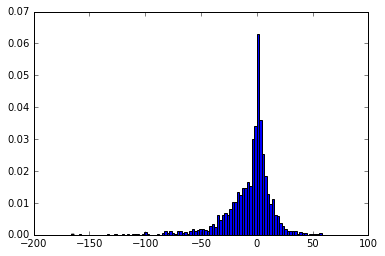

In [140]:
c = 1
diff =[]
index = (prediction_a.prediction == c) & (prediction_p.prediction != c) & (prediction_a.label == c)
n = np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_others = []
    for g in groups:
        if g != str(c):
            data_others.append(model[g].score(sentences))
    data_others=np.array(data_others)
    data = model[str(c)].score(sentences)
    dif =  data - data_others.max(axis=0)
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=100,normed=True)
print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

### Compare two classes

62.0043 -119.527 -3.74038 11.7903 -1.19778394699


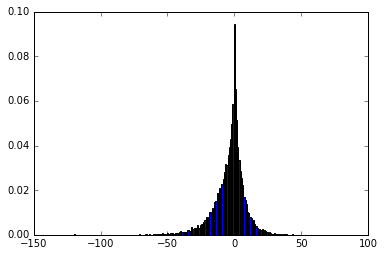

In [146]:
c1 = 5
c2 = 4
diff =[]
index = (prediction_p.label == c1) & (prediction_p.prediction == c2)
n = np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_c1 = model[str(c1)].score(sentences)
    data_c2 = model[str(c2)].score(sentences)
    dif = data_c1 - data_c2
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=200,normed=True)

print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)

83.2499 -112.091 -3.85172 11.7902 -0.568268954754


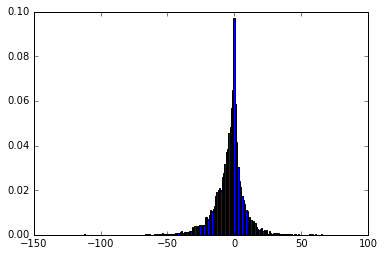

In [147]:
c1 = 5
c2 = 4
diff =[]
index = (prediction_a.label == c1) & (prediction_a.prediction == c2) 
n = np.where(index)[0].shape[0]
for i in range(n):
    sentences = prediction_a[index].txt.values[i]
    data_c1 = model[str(c1)].score(sentences)
    data_c2 = model[str(c2)].score(sentences)
    dif = data_c1 - data_c2
    diff.append(dif)
diff = np.concatenate(diff)
_=plt.hist(diff,bins=200,normed=True)

print diff.max(),diff.min(),diff.mean(),diff.std(),skew(diff)